## Project 1: Test a Perceptual Phenomenon
### Udacity Data Analyst Nanodegree Program
February 21, 2016  
Eron Lloyd

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
plt.rc('figure', figsize=(12, 6))

### Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color: red">RED</span>, <span style="color: blue;">BLUE</span>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color: green;">PURPLE</span>, <span style="color: purple;">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

### 1. What is our independent variable? What is our dependent variable?

In the experiment, the independent variable is the congruency of the spelled-out words with the actual colors they represent, (i.e. whether the participant sees <span style="color: red;">RED</span> or <span style="color: blue;">RED</span>). The dependent variable is the reaction time necessary for the participant to read back the color of the word.

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Reviewing the original published article on this phenomenon, *Studies of interference in serial verbal reactions* by John Ridley Stroop, I learned that a significant difference was detected in the reaction time of participants when asked to read the color of words

![Second Experiment](Stroop-fig1-exp2.jpg)


An appropriate set of hypotheses would be:  
> **H<sub>0</sub>: µ<sub>I</sub> = µ<sub>C</sub>**    
> **H<sub>A</sub>: µ<sub>I</sub> > µ<sub>C</sub>**

where H<sub>0</sub> signifies that there is no difference in the time needed to read the ink colors of the congruent and incongruent words, while H<sub>A</sub> signifies that reading the ink color of words incongrent with their acutal text takes more reaction time than words congruent with their text.

To test this, I will perform a repeated measures t-test, because the population parameters are not available, and the sample size is small.

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

#### Loading of Libraries and Data

For this project, we will be using the Python libraries pandas, NumPy, SciPy, and matplotlib to analyze and visualize the data. The first step is to load the dataset from its CSV file and into a pandas DataFrame for analysis:

In [177]:
data = pd.read_csv('stroopdata.csv')

In [178]:
data[['Congruent', 'Incongruent']].head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


Above we have a table of the first five rows of data. As described in the [project instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True), "each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task." Although it is not specified, we will assume that the performance is in seconds, consistent with other versions of the experiment.

In [190]:
data.count()

Congruent      24
Incongruent    24
dtype: int64

There are 24 pairs of values in the dataset that we will now be comparing. Utilizing a t-test is effective in these cases.

#### Measures of Central Tendency

Measures of Central Tendency include the mean, median, and mode, and are generally used to give "an idea of what a typical or common value for a variable is" (Boslaugh, p. 84). Next we review some basic descriptive statistics of the dataset, as presented by pandas using its [descriptive stats API](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats). We have a total of 24 rows of data, each having two measures, so we will describe each column's measures of central tendency separately.


In [195]:
data.mean().round(3)

Congruent      14.051
Incongruent    22.016
dtype: float64

In [188]:
data.median().round(3)

Congruent      14.356
Incongruent    21.018
dtype: float64

The mean for congruent readings is 14.051 seconds, while incongruent readings average 22.016 seconds, taking nearly 60% more time to read. Likewise, the median for congruent readings is 14.356 seconds, and 21.018 for incongruent readings. There is no mode to account for, comparatively, unless we round out to whole numbers.



#### Measures of Variability

The standard deviation for congruent readings is 3.559 seconds, and 4.797 seconds for incongruent readings, indicating higher variability in the participant's ability to read the latter test's colors, which we believe is due in part to the incongruency of the text and colors.

In [165]:
con_mean = data_stats.loc['mean', 'Congruent']
con_std = data_stats.loc['std', 'Congruent']
data['Con. Z-Score'] = (data['Congruent'] - con_mean) / con_std
incon_mean = data_stats.loc['mean', 'Incongruent']
incon_std = data_stats.loc['std', 'Incongruent']
data['Incon. Z-Score'] = (data['Incongruent'] - incon_mean) / incon_std

### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

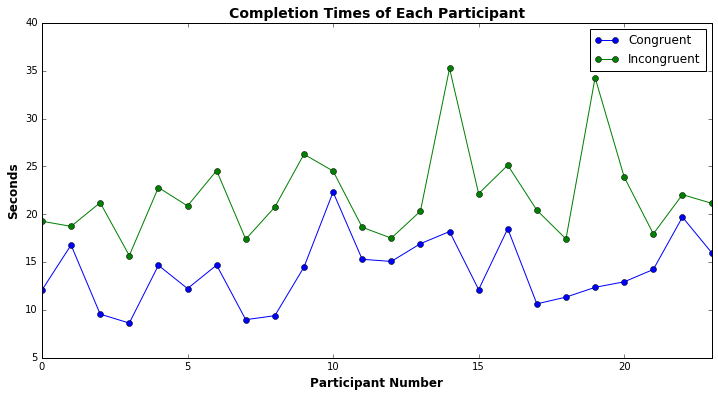

In [159]:
axes = data[['Congruent', 'Incongruent']].plot(marker='o')
_ = axes.set_xlabel('Participant Number', fontsize='12', fontweight='bold')
_ = axes.set_ylabel('Seconds', fontsize='12', fontweight='bold')
_ = axes.set_title('Completion Times of Each Participant', fontsize='14', fontweight='bold')

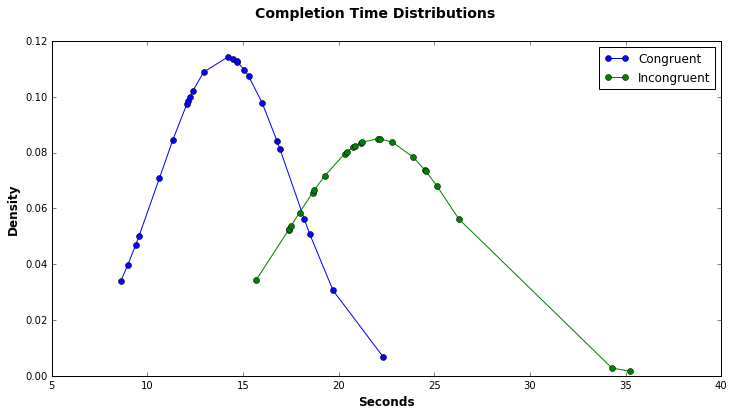

In [155]:
con_x_values = data['Congruent'].sort_values().values
incon_x_values = data['Incongruent'].sort_values().values

con_fit_curve = stats.norm.pdf(con_x_values, np.mean(con_x_values), np.std(con_x_values))
incon_fit_curve = stats.norm.pdf(incon_x_values, np.mean(incon_x_values), np.std(incon_x_values))

fig = plt.figure()
fig.suptitle('Completion Time Distributions', fontsize='14', fontweight='bold')
ax = fig.add_subplot(1, 1, 1)
ax.plot(con_x_values, con_fit_curve, '-o', label='Congruent')
ax.plot(incon_x_values, incon_fit_curve, '-o', label='Incongruent')
ax.set_xlabel('Seconds', fontsize='12', fontweight='bold')
ax.set_ylabel('Density', fontsize='12', fontweight='bold')
_ = ax.legend(loc='best')

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!